<a href="https://colab.research.google.com/github/dangtrantrung/Build_Neural_Network_with_TensorFlow_TensorBoard.ipynb/blob/master/Build_Neural_Network_with_TensorFlow_TensorBoard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
!pip install -U tensorflow==2.9.2
import tensorflow as tf
print(tf.__version__)

2.12.0


In [22]:
# Operations in Computational Graph
import numpy as np
x_vals=np.array([1.,3.,5.,7.,9.])
x_data=tf.Variable(x_vals,dtype=tf.float32)
m_const=tf.constant(3.)
operation=tf.multiply(x_data,m_const)
for result in operation:
  print(result.numpy())


3.0
9.0
15.0
21.0
27.0


In [23]:
operation

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  9., 15., 21., 27.], dtype=float32)>

In [24]:
# Combine operations to layers Graph
import numpy as np
my_array=np.array([[1.,3.,5.,7.,9.],[-2.,0.,2.,4.,6.],[-6.,-3.,0,3.,6.]])
x_vals=np.array([my_array,my_array+1])
x_data=tf.Variable(x_vals,dtype=tf.float32)
x_data

<tf.Variable 'Variable:0' shape=(2, 3, 5) dtype=float32, numpy=
array([[[ 1.,  3.,  5.,  7.,  9.],
        [-2.,  0.,  2.,  4.,  6.],
        [-6., -3.,  0.,  3.,  6.]],

       [[ 2.,  4.,  6.,  8., 10.],
        [-1.,  1.,  3.,  5.,  7.],
        [-5., -2.,  1.,  4.,  7.]]], dtype=float32)>

In [25]:
m1=tf.constant([[1.],[0.,],[-1.],[2.],[4.]])
m2=tf.constant([[2.]])
a1=tf.constant([[10.]])

In [26]:
# Operation layer
def prod1(a,b):
  return tf.matmul(a,b)
def prod2(a,b):
  return tf.matmul(a,b)
def add1(a,b):
  return tf.add(a,b)

In [27]:
result = add1(prod2(prod1(x_data,m1),m2),a1)
print(result.numpy())

[[[102.]
  [ 66.]
  [ 58.]]

 [[114.]
  [ 78.]
  [ 70.]]]


In [28]:
class Operations():
  def __init__(self,a):
    self.result=a
  def apply(self,func,b):
    self.result=func(self.result,b)
    return self


operation= (Operations(a=x_data)
            .apply(prod1,b=m1)
            .apply(prod2,b=m2)
            .apply(add1,b=a1))

print(operation.result.numpy())

[[[102.]
  [ 66.]
  [ 58.]]

 [[114.]
  [ 78.]
  [ 70.]]]


In [29]:
v=tf.Variable(initial_value=tf.random.normal(shape=(1,5)),shape=tf.TensorShape((None,5)))
print(v)
v.assign(tf.random.normal(shape=(10,5)))


<tf.Variable 'Variable:0' shape=(None, 5) dtype=float32, numpy=
array([[-0.45701224, -0.40686727,  0.72857773, -0.8929778 ,  0.31261146]],
      dtype=float32)>


<tf.Variable 'UnreadVariable' shape=(None, 5) dtype=float32, numpy=
array([[ 1.6940167 ,  0.11969317, -1.15846   ,  0.17260402, -0.7144963 ],
       [ 0.6896006 , -1.0908159 , -1.1865103 , -1.3021879 ,  1.2240021 ],
       [ 0.02296034, -1.1901162 , -2.434076  , -1.0394632 ,  0.9252474 ],
       [ 0.25100416,  1.1897256 ,  0.48010707,  0.1201513 , -0.72489226],
       [ 1.5912361 , -0.6388258 ,  0.2932749 , -0.48945993,  0.616218  ],
       [-1.6654143 , -0.36168018, -0.9978031 ,  1.1436363 , -0.60999393],
       [ 0.6483788 ,  1.4117979 , -0.9405521 ,  0.72718686,  0.7877751 ],
       [ 0.38463053,  3.1286867 , -0.50672334,  0.6007662 , -2.2236547 ],
       [ 0.20875943,  1.0211804 ,  0.40374115,  0.3474413 , -0.15391165],
       [ 1.5231864 ,  0.4462123 ,  1.2994826 , -1.722251  ,  0.4278689 ]],
      dtype=float32)>

In [30]:
# Work with Many Layers
batch_size=[1]
x_shape=[4,4,1]
x_data=tf.random.uniform(shape=batch_size+x_shape)
x_data


<tf.Tensor: shape=(1, 4, 4, 1), dtype=float32, numpy=
array([[[[0.734782  ],
         [0.14221263],
         [0.06338346],
         [0.18919992]],

        [[0.7981709 ],
         [0.7042463 ],
         [0.4089347 ],
         [0.51427484]],

        [[0.07216728],
         [0.3453163 ],
         [0.7506119 ],
         [0.15332139]],

        [[0.26366293],
         [0.62515056],
         [0.6546776 ],
         [0.19634163]]]], dtype=float32)>

In [31]:
def mov_avg_layer(x):
  my_filter=tf.constant(0.25,shape=[2,2,1,1])
  my_strides=[1,2,2,1]
  layer=tf.nn.conv2d(x,my_filter,my_strides,padding="SAME",name="Moving_Avg_Window")
  return layer


In [32]:
def custom_layer(input_matrix):
  input_matrix_squeezed=tf.squeeze(input_matrix)
  A=tf.constant([[1.,2.],[-1.,3.]])
  b=tf.constant(1.,shape=[2,2])
  temp1=tf.matmul(A,input_matrix_squeezed)
  temp=tf.add(temp1,b) # Ax+b
  return(tf.sigmoid(temp))


In [33]:
first_layer=mov_avg_layer(x_data)
second_layer=custom_layer(first_layer)

In [34]:
print(second_layer)

tf.Tensor(
[[0.904478   0.8976539 ]
 [0.799772   0.88311505]], shape=(2, 2), dtype=float32)


In [35]:
# Build LOSS functions
import matplotlib.pyplot as plt

In [36]:
def l2(y_true,y_pred):
  return tf.square(y_true-y_pred)
def l1(y_true,y_pred):
  return tf.abs(y_true-y_pred)
def phuber1(y_true,y_pred):
  delta1=tf.constant(0.25)
  return tf.multiply(tf.square(delta1),tf.sqrt(1.+tf.square((y_true-y_pred)/delta1))-1.)
def phuber2(y_true,y_pred):
  delta2=tf.constant(5.)
  return tf.multiply(tf.square(delta2),tf.sqrt(1.+tf.square((y_true-y_pred)/delta2))-1.)

def hinge(y_true, y_pred):
    return tf.maximum(0., 1. - tf.multiply(y_true, y_pred))
def xentropy(y_true, y_pred):
    return (- tf.multiply(y_true, tf.math.log(y_pred)) -
          tf.multiply((1. - y_true), tf.math.log(1. - y_pred)))
def xentropy_sigmoid(y_true, y_pred):
    return tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,
                                                   logits=y_pred)
def xentropy_weighted(y_true, y_pred):
    weight = tf.constant(0.5)
    return tf.nn.weighted_cross_entropy_with_logits(labels=y_true,
                                                    logits=y_pred,
                                                pos_weight=weight)
def softmax_xentropy(y_true, y_pred):
    return tf.nn.softmax_cross_entropy_with_logits(labels=y_true,                                                    logits=y_pred)

unscaled_logits = tf.constant([[1., -3., 10.]])
target_dist = tf.constant([[0.1, 0.02, 0.88]])
print(softmax_xentropy(y_true=target_dist,y_pred=unscaled_logits))


tf.Tensor([1.1601256], shape=(1,), dtype=float32)


In [37]:
def sparse_xentropy(y_true, y_pred):
    return tf.nn.sparse_softmax_cross_entropy_with_logits(
                                                    labels=y_true,
                                                    logits=y_pred)
unscaled_logits = tf.constant([[1., -3., 10.]])
sparse_target_dist = tf.constant([2])
print(sparse_xentropy(y_true=sparse_target_dist,
                      y_pred=unscaled_logits))

tf.Tensor([0.00012564], shape=(1,), dtype=float32)


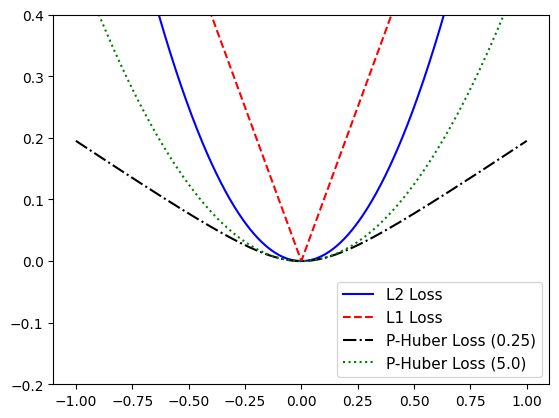

In [38]:
# How it works...
# Here is how to use matplotlib to plot the regression loss functions:
x_vals = tf.linspace(-1., 1., 500)
target = tf.constant(0.)
funcs = [(l2, 'b-', 'L2 Loss'),
         (l1, 'r--', 'L1 Loss'),
         (phuber1, 'k-.', 'P-Huber Loss (0.25)'),
         (phuber2, 'g:', 'P-Huber Loss (5.0)')]
for func, line_type, func_name in funcs:
    plt.plot(x_vals, func(y_true=target, y_pred=x_vals),
             line_type, label=func_name)
plt.ylim(-0.2, 0.4)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()

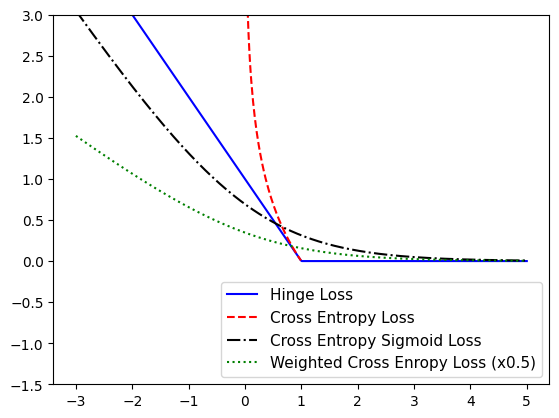

In [39]:
# use matplotlib to plot the various classification loss functions:

x_vals = tf.linspace(-3., 5., 500)
target = tf.fill([500,], 1.)
funcs = [(hinge, 'b-', 'Hinge Loss'),
         (xentropy, 'r--', 'Cross Entropy Loss'),
         (xentropy_sigmoid, 'k-.', 'Cross Entropy Sigmoid Loss'),
         (xentropy_weighted, 'g:', 'Weighted Cross Enropy Loss (x0.5)')]
for func, line_type, func_name in funcs:
    plt.plot(x_vals, func(y_true=target, y_pred=x_vals), line_type, label=func_name)
plt.ylim(-1.5, 3)
plt.legend(loc='lower right', prop={'size': 11})
plt.show()


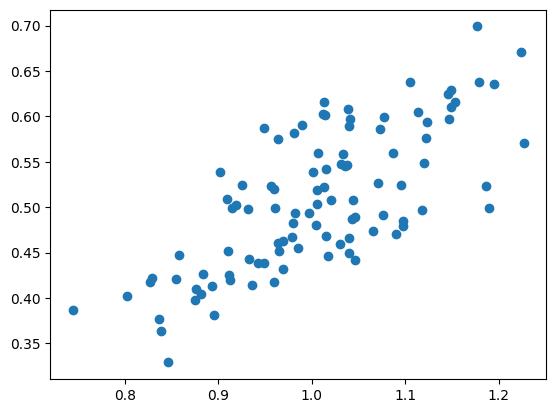

In [40]:
# BackPropagation in TensorFlow
np.random.seed(0)
x_vals=np.random.normal(1,0.1,100).astype(np.float32)
y_vals=(x_vals*(np.random.normal(1,0.05,100)-0.5)).astype(np.float32)
plt.scatter(x_vals,y_vals)
plt.show()



In [41]:
def my_output(X,weights,biases):
  return tf.add(tf.multiply(X,weights),biases)

In [42]:
def loss_func(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_pred-y_true))

In [43]:
my_opt=tf.optimizers.SGD(learning_rate=0.02)

In [44]:
tf.random.set_seed(1)
np.random.seed(0)
weights=tf.Variable(tf.random.normal(shape=[1]))
biases=tf.Variable(tf.random.normal(shape=[1]))
history=list()

for i in range(100):
  rand_index=np.random.choice(100)
  rand_x=[x_vals[rand_index]]
  rand_y=[y_vals[rand_index]]
  with tf.GradientTape() as tape:
    predictions = my_output(x_vals,weights,biases)
    loss=loss_func(rand_y,predictions)
  history.append(loss.numpy())
  gradients=tape.gradient(loss,[weights,biases])
  my_opt.apply_gradients(zip(gradients,[weights,biases]))
  if (i + 1) % 25==0:
    print(f'Step # {i+1} Weights:{weights.numpy()} Biases: {biases.numpy()}')
    print(f'LOSS : {loss.numpy()}')





Step # 25 Weights:[-0.57664514] Biases: [0.9168456]
LOSS : 0.08858172595500946
Step # 50 Weights:[-0.5007782] Biases: [0.98691857]
LOSS : 0.006724955514073372
Step # 75 Weights:[-0.48637515] Biases: [0.99630713]
LOSS : 0.008112422190606594
Step # 100 Weights:[-0.4859925] Biases: [0.99183553]
LOSS : 0.025065265595912933


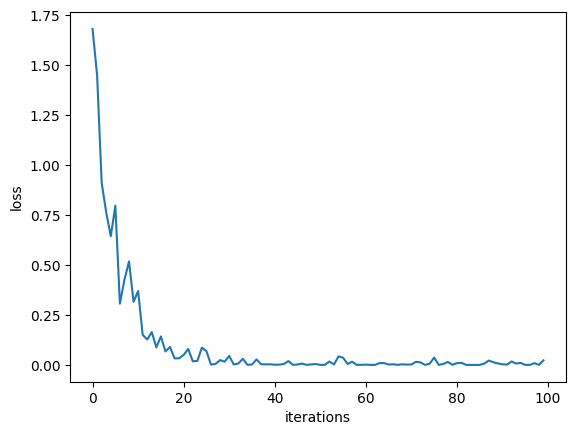

In [45]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [46]:
np.random.seed(0)
x_vals=np.concatenate((np.random.normal(-3,1,50),np.random.normal(3,1,50))).astype(np.float32)
y_vals=np.concatenate((np.repeat(0.,50),np.repeat(1.,50))).astype(np.float32)

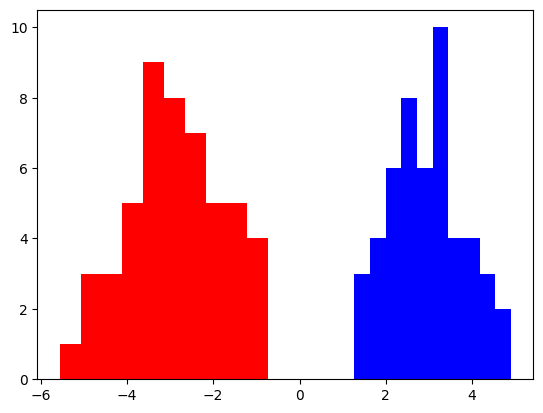

In [47]:
plt.hist(x_vals[y_vals==1],color='b')
plt.hist(x_vals[y_vals==0],color='r')
plt.show()

In [48]:
# Apply with others LOSS functions
def loss_func(y_true,y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [49]:
my_opt=tf.optimizers.SGD(learning_rate=0.02)

In [50]:
tf.random.set_seed(1)
np.random.seed(0)
weights=tf.Variable(tf.random.normal(shape=[1]))
biases=tf.Variable(tf.random.normal(shape=[1]))
history=list()

for i in range(100):
  rand_index=np.random.choice(100)
  rand_x=[x_vals[rand_index]]
  rand_y=[y_vals[rand_index]]
  with tf.GradientTape() as tape:
    predictions = my_output(rand_x,weights,biases)
    loss=loss_func(rand_y,predictions)
  history.append(loss.numpy())
  gradients=tape.gradient(loss,[weights,biases])
  my_opt.apply_gradients(zip(gradients,[weights,biases]))
  if (i + 1) % 25==0:
    print(f'Step # {i+1} Weights:{weights.numpy()} Biases: {biases.numpy()}')
    print(f'LOSS : {loss.numpy()}')

Step # 25 Weights:[-0.01804185] Biases: [0.44081175]
LOSS : 0.5967269539833069
Step # 50 Weights:[0.49321094] Biases: [0.37732077]
LOSS : 0.3199256658554077
Step # 75 Weights:[0.7071932] Biases: [0.32154965]
LOSS : 0.03642747551202774
Step # 100 Weights:[0.8395616] Biases: [0.30409005]
LOSS : 0.028119442984461784


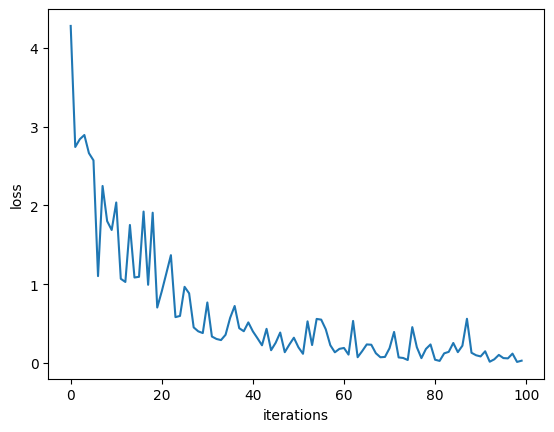

In [51]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

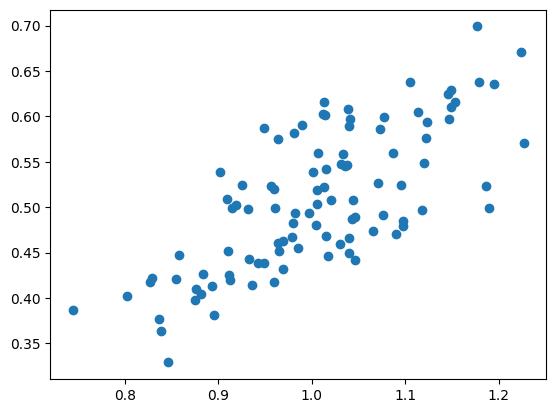

In [52]:
# Batching data and stochastic training
batch_size=20
np.random.seed(0)
x_vals=np.random.normal(1,0.1,100).astype(np.float32)
y_vals=(x_vals*(np.random.normal(1,0.05,100)-0.5)).astype(np.float32)
plt.scatter(x_vals,y_vals)
plt.show()

In [53]:
def loss_func(y_true,y_pred):
  return tf.reduce_mean(tf.square(y_pred-y_true))

In [60]:
my_opt=tf.optimizers.SGD(learning_rate=0.02)

In [58]:
tf.random.set_seed(1)
np.random.seed(0)
weights=tf.Variable(tf.random.normal(shape=[1]))
biases=tf.Variable(tf.random.normal(shape=[1]))
history_batch=list()

for i in range(50):
  rand_index=np.random.choice(100,size=batch_size)
  rand_x=[x_vals[rand_index]]
  rand_y=[y_vals[rand_index]]
  with tf.GradientTape() as tape:
    predictions = my_output(rand_x,weights,biases)
    loss=loss_func(rand_y,predictions)
  history_batch.append(loss.numpy())
  gradients=tape.gradient(loss,[weights,biases])
  my_opt.apply_gradients(zip(gradients,[weights,biases]))
  if (i + 1) % 25==0:
    print(f'Step # {i+1} Weights:{weights.numpy()} Biases: {biases.numpy()}')
    print(f'LOSS : {loss.numpy()}')

Step # 25 Weights:[-0.5558849] Biases: [0.93091005]
LOSS : 0.058969467878341675
Step # 50 Weights:[-0.4879131] Biases: [0.98653436]
LOSS : 0.01628759130835533


In [61]:
tf.random.set_seed(1)
np.random.seed(0)
weights=tf.Variable(tf.random.normal(shape=[1]))
biases=tf.Variable(tf.random.normal(shape=[1]))
history_stochastic=list()

for i in range(50):
  rand_index=np.random.choice(100,size=1)
  rand_x=[x_vals[rand_index]]
  rand_y=[y_vals[rand_index]]
  with tf.GradientTape() as tape:
    predictions = my_output(rand_x,weights,biases)
    loss=loss_func(rand_y,predictions)
  history_stochastic.append(loss.numpy())
  gradients=tape.gradient(loss,[weights,biases])
  my_opt.apply_gradients(zip(gradients,[weights,biases]))
  if (i + 1) % 25==0:
    print(f'Step # {i+1} Weights:{weights.numpy()} Biases: {biases.numpy()}')
    print(f'LOSS : {loss.numpy()}')

Step # 25 Weights:[-0.58009654] Biases: [0.91217995]
LOSS : 0.13842473924160004
Step # 50 Weights:[-0.5050226] Biases: [0.9813488]
LOSS : 0.006441597361117601


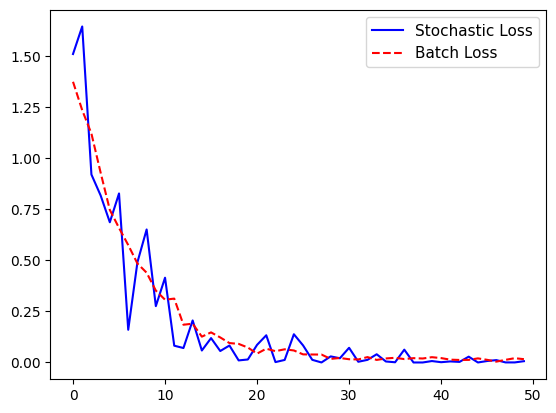

In [62]:
plt.plot(history_stochastic,'b-',label='Stochastic Loss')
plt.plot(history_batch,'r--',label='Batch Loss')
plt.legend(loc='upper right',prop={'size':11})
plt.show()

In [75]:
# Training with IRIS Data
import tensorflow_datasets as tfds
iris=tfds.load('iris',split='train[:90%]', as_supervised=True)
iris_test=tfds.load('iris',split='train[90%:]', as_supervised=True)
iris,iris_test


(<_PrefetchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [76]:
batch_size=20

In [77]:
def iris2d(features,label):
  return features[2:], tf.cast((label==0),dtype=tf.float32)

train_generator=(iris.map(iris2d).shuffle(buffer_size=100).batch(batch_size))

test_generator=iris_test.map(iris2d).batch(1)
train_generator

<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [71]:
print(train_generator)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


In [85]:
def linear_model(X, A, b):
    my_output = tf.add(tf.matmul(X, A), b)
    return tf.squeeze(my_output)

In [80]:
def xentropy(y_true,y_pred):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [86]:
my_opt=tf.optimizers.SGD(learning_rate=0.02)

In [82]:
print(tf.__version__)

2.12.0


In [88]:
tf.random.set_seed(1)
np.random.seed(0)
A = tf.Variable(tf.random.normal(shape=[2, 1]))
b = tf.Variable(tf.random.normal(shape=[1]))
history = list()
for i in range(300):
    iteration_loss = list()
    for features, label in train_generator:
        with tf.GradientTape() as tape:
            predictions = linear_model(features, A, b)
            loss = xentropy(label, predictions)
        iteration_loss.append(loss.numpy())
        gradients = tape.gradient(loss, [A, b])
        my_opt.apply_gradients(zip(gradients, [A, b]))
    history.append(np.mean(iteration_loss))
    if (i + 1) % 30 == 0:
        print(f'Step # {i+1} Weights: {A.numpy().T} \
              Biases: {b.numpy()}')
        print(f'Loss = {loss.numpy()}')

Step # 30 Weights: [[-1.1171665  1.2992798]]               Biases: [1.0143887]
Loss = 0.4540802240371704
Step # 60 Weights: [[-1.1839774  1.0773786]]               Biases: [1.5143299]
Loss = 0.3230114281177521
Step # 90 Weights: [[-1.2467275   0.89076906]]               Biases: [1.933906]
Loss = 0.2258119285106659
Step # 120 Weights: [[-1.3001114  0.7332199]]               Biases: [2.2921157]
Loss = 0.24052231013774872
Step # 150 Weights: [[-1.3525541  0.5961851]]               Biases: [2.600462]
Loss = 0.1578115075826645
Step # 180 Weights: [[-1.4020127   0.47615087]]               Biases: [2.8695445]
Loss = 0.14636631309986115
Step # 210 Weights: [[-1.4458225   0.37038064]]               Biases: [3.1085904]
Loss = 0.1445574313402176
Step # 240 Weights: [[-1.4853774  0.275887 ]]               Biases: [3.3229866]
Loss = 0.13376042246818542
Step # 270 Weights: [[-1.5250583   0.18953313]]               Biases: [3.5163538]
Loss = 0.139933243393898
Step # 300 Weights: [[-1.5611047   0.1109

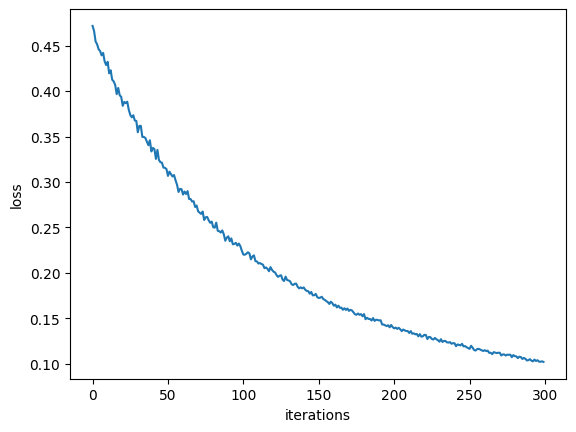

In [89]:
plt.plot(history)
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

In [91]:
predictions = list()
labels = list()
for features, label in test_generator:
    predictions.append(linear_model(features, A, b).numpy())
    labels.append(label.numpy()[0])

test_loss = xentropy(np.array(labels), np.array(predictions)).numpy()
print(f"test cross-entropy is {test_loss}")

test cross-entropy is 0.10223709046840668


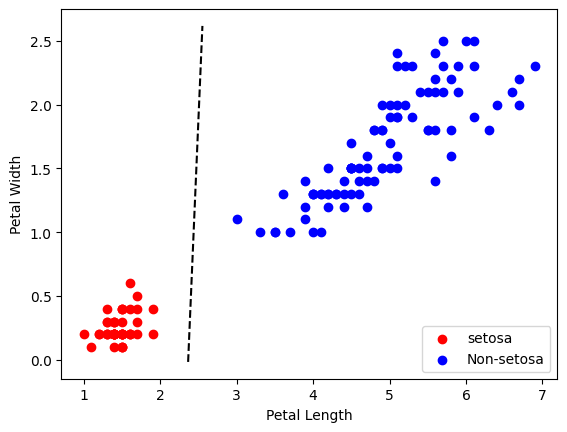

In [92]:
coefficients = np.ravel(A.numpy())
intercept = b.numpy()
# Plotting batches of examples
for j, (features, label) in enumerate(train_generator):
    setosa_mask = label.numpy() == 1
    setosa = features.numpy()[setosa_mask]
    non_setosa = features.numpy()[~setosa_mask]
    plt.scatter(setosa[:,0], setosa[:,1], c='red', label='setosa')
    plt.scatter(non_setosa[:,0], non_setosa[:,1], c='blue', label='Non-setosa')
    if j==0:
        plt.legend(loc='lower right')
# Computing and plotting the decision function
a = -coefficients[0] / coefficients[1]
xx = np.linspace(plt.xlim()[0], plt.xlim()[1], num=10000)
yy = a * xx - intercept / coefficients[1]
on_the_plot = (yy > plt.ylim()[0]) & (yy < plt.ylim()[1])
plt.plot(xx[on_the_plot], yy[on_the_plot], 'k--')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()